## EDA 분석 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_I10 = pd.read_csv('../../../dataset/Join Collection NSC2_BND_M20.csv')

In [3]:
df_I10_select = df_I10[['ED_RC_TOT_AMT','EDC_SBA','BTH_YYYY']]
df_I10_select[:2]

,ED_RC_TOT_AMT,EDC_SBA,BTH_YYYY
0,7570,3000,1921LE
1,18160,6000,1921LE


In [4]:
df_I10.isnull().sum()

Unnamed: 0           0
ED_RC_TOT_AMT        0
MCARE_SUBJ_CD        0
OPRTN_YN             0
MCARE_RSLT_TYPE    424
EDC_SBA              0
BTH_YYYY             0
dtype: int64

In [5]:
df_I10 = df_I10.dropna()

### 상관관계 확인 
- 'ED_RC_TOT_AMT','MCARE_SUBJ_CD','OPRTN_YN','MCARE_RSLT_TYPE','EDC_SBA','BTH_YYYY'

### 목표 변수 확인 

In [6]:
df_I10['ED_RC_TOT_AMT']

0        7570
1       18160
2        7570
3       14200
4        7310
        ...  
4624     9050
4625     9050
4626     9050
4627     9380
4628    12280
Name: ED_RC_TOT_AMT, Length: 4205, dtype: int64

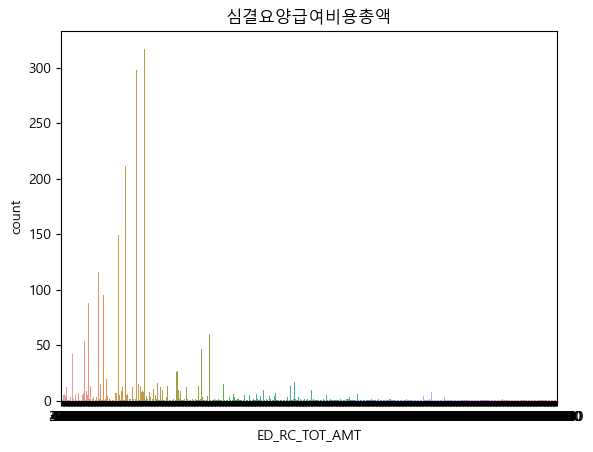

In [7]:
sns.countplot(data=df_I10, x='ED_RC_TOT_AMT')
plt.title("심결요양급여비용총액")
plt.show()

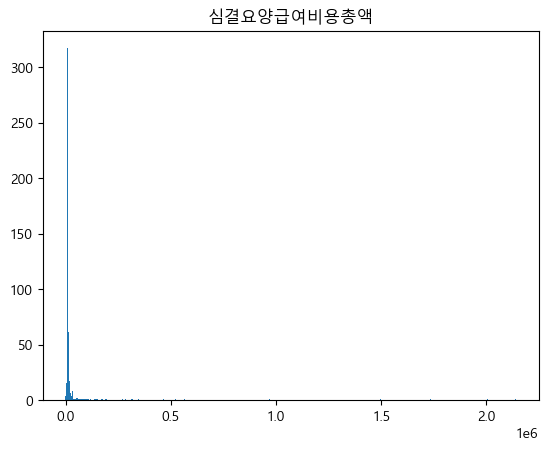

In [8]:
# y축의 값을 지정하기 위해 데이터의 빈도수 계산
value_counts = df_I10['ED_RC_TOT_AMT'].value_counts()
plt.bar(value_counts.index, value_counts.values, width=5000)  # 막대의 너비는 임의로 설정
plt.title("심결요양급여비용총액")
plt.show()

### 설면변수 확인
- 'EDC_SBA','BTH_YYYY'

In [9]:
continous_list = df_I10_select.describe().columns
continous_list

Index(['ED_RC_TOT_AMT', 'EDC_SBA'], dtype='object')

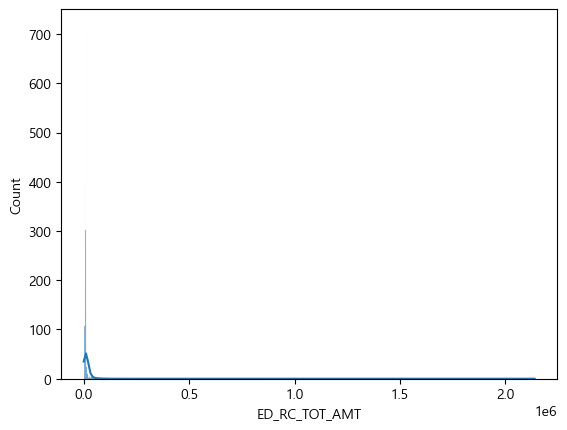

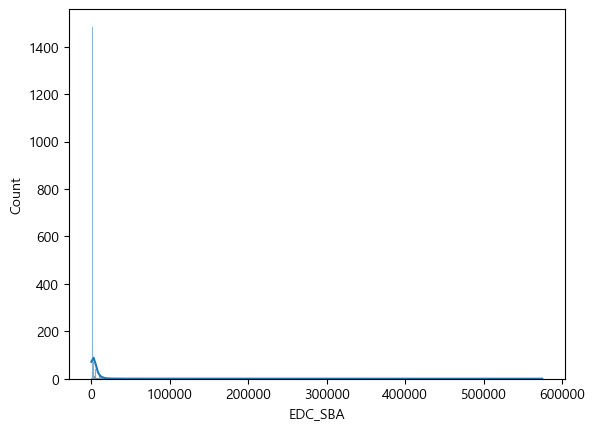

In [10]:
## for문을 사용해서 histplot 그래프 

for  continous in continous_list : 
    sns.histplot(data=df_I10_select, x=continous, kde=True) # 연속형 histplot그래프 사용  #hue='입원기간'
    plt.show()

In [13]:
df_I10['EDC_SBA'].value_counts()

1500      1480
3000       942
3100       195
2900       173
1000       136
          ... 
419100       1
542210       1
12920        1
574770       1
25200        1
Name: EDC_SBA, Length: 353, dtype: int64

In [15]:
condition = (df_I10['EDC_SBA']>1000)
df_I10 = df_I10[condition]

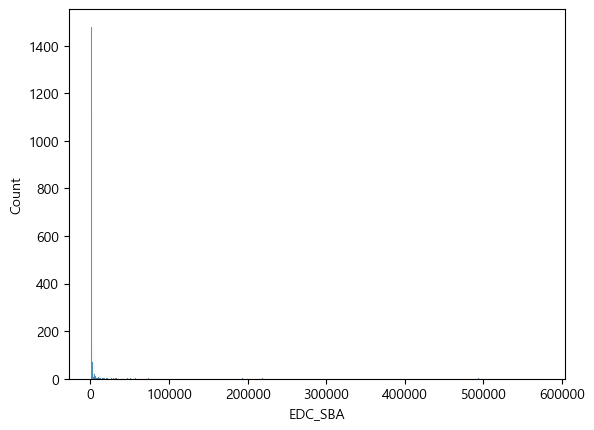

In [17]:
sns.histplot(data=df_I10, x='EDC_SBA')
plt.show()

<Axes: xlabel='BTH_YYYY', ylabel='count'>

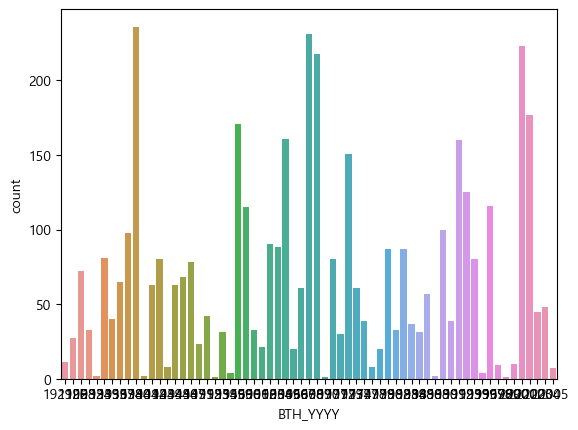

In [11]:
sns.countplot(data=df_I10, x='BTH_YYYY')